#Resnet Week 5 Colab Prototype

Data: PIC_NUMBER = 25, THRESHOLD = 100

Runtime: changed runtime type to GPU

Files setting: Mount to Google Drive

In [ ]:
# IMPORTANT
# for compatible torch, otherwise would have to directly edit the fastai files 
# as shown here: https://forums.fast.ai/t/fastai-throwing-a-runtime-error-when-using-custom-train-test-sets/70262/6
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 55.0MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
# if not done so, mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# first, unzip the uploaded file
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/My Drive/Junior Year/CS121/data/small_25_100_data.zip', 'r')
directory_to_extract_to = '/content/drive/My Drive/Junior Year/CS121/data/art'
zip_ref.extractall(directory_to_extract_to)
zip_ref.close()

In [ ]:
# now, find all the classes real quick
import os

data_dir = '/content/drive/My Drive/Junior Year/CS121/data/art/small_25_100_data'
classes = [x[0].replace(data_dir+"/",'') for x in os.walk(data_dir)]

print(classes)
# for mine the first and last part of the list were weird lol
# classes = classes[1:-1]
# for yours probably (hopefully) only the first is weird, because it is the name of the folder itself
classes = classes[1:]
print(classes)

['/content/drive/My Drive/Junior Year/CS121/data/art/small_25_100_data', 'Abstract Art', 'Abstract Expressionism', 'Art Informel', 'Art Nouveau (Modern)', 'Baroque', 'Cubism', 'Early Renaissance', 'Expressionism', 'High Renaissance', 'Impressionism', 'Magic Realism', 'Mannerism (Late Renaissance)', 'Naïve Art (Primitivism)', 'Neoclassicism', 'Northern Renaissance', 'Post-Impressionism', 'Realism', 'Rococo', 'Romanticism', 'Surrealism', 'Symbolism', 'Ukiyo-e']
['Abstract Art', 'Abstract Expressionism', 'Art Informel', 'Art Nouveau (Modern)', 'Baroque', 'Cubism', 'Early Renaissance', 'Expressionism', 'High Renaissance', 'Impressionism', 'Magic Realism', 'Mannerism (Late Renaissance)', 'Naïve Art (Primitivism)', 'Neoclassicism', 'Northern Renaissance', 'Post-Impressionism', 'Realism', 'Rococo', 'Romanticism', 'Surrealism', 'Symbolism', 'Ukiyo-e']


In [ ]:
import fastai
from fastai.vision import *

# remove bad images
for c in classes:
    print(c)
    verify_images(data_dir+"/"+c, delete=True, max_size = 500)

Abstract Art


Abstract Expressionism


Art Informel


Art Nouveau (Modern)


Baroque


Cubism


Early Renaissance


Expressionism


High Renaissance


Impressionism


Magic Realism


Mannerism (Late Renaissance)


Naïve Art (Primitivism)


Neoclassicism


Northern Renaissance


Post-Impressionism


Realism


Rococo


Romanticism


Surrealism


Symbolism


Ukiyo-e


In [ ]:
# create the data bunch!

# import numpy
# np.random.seed(42)
data = ImageDataBunch.from_folder(data_dir, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=16, num_workers=4).normalize(imagenet_stats)

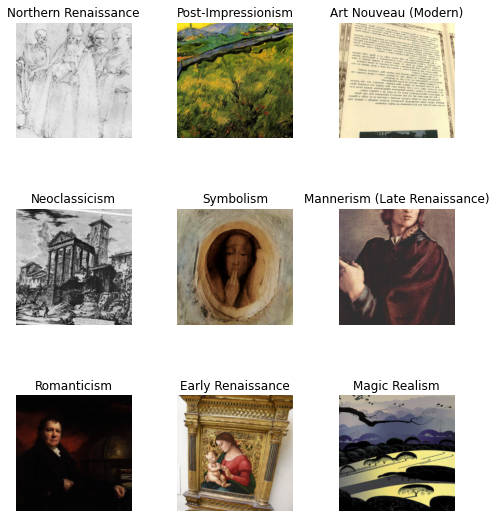

In [ ]:
data.show_batch(rows=3, figsize=(7,8))


In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Abstract Art',
  'Abstract Expressionism',
  'Art Informel',
  'Art Nouveau (Modern)',
  'Baroque',
  'Cubism',
  'Early Renaissance',
  'Expressionism',
  'High Renaissance',
  'Impressionism',
  'Magic Realism',
  'Mannerism (Late Renaissance)',
  'Naïve Art (Primitivism)',
  'Neoclassicism',
  'Northern Renaissance',
  'Post-Impressionism',
  'Realism',
  'Rococo',
  'Romanticism',
  'Surrealism',
  'Symbolism',
  'Ukiyo-e'],
 22,
 440,
 109)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,4.063890,3.712165,0.715596,00:08
1,3.136142,2.858355,0.669725,00:08
2,2.330784,2.867544,0.660550,00:08
3,1.806321,2.758161,0.651376,00:07


In [ ]:
learn.save('stage-1')


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


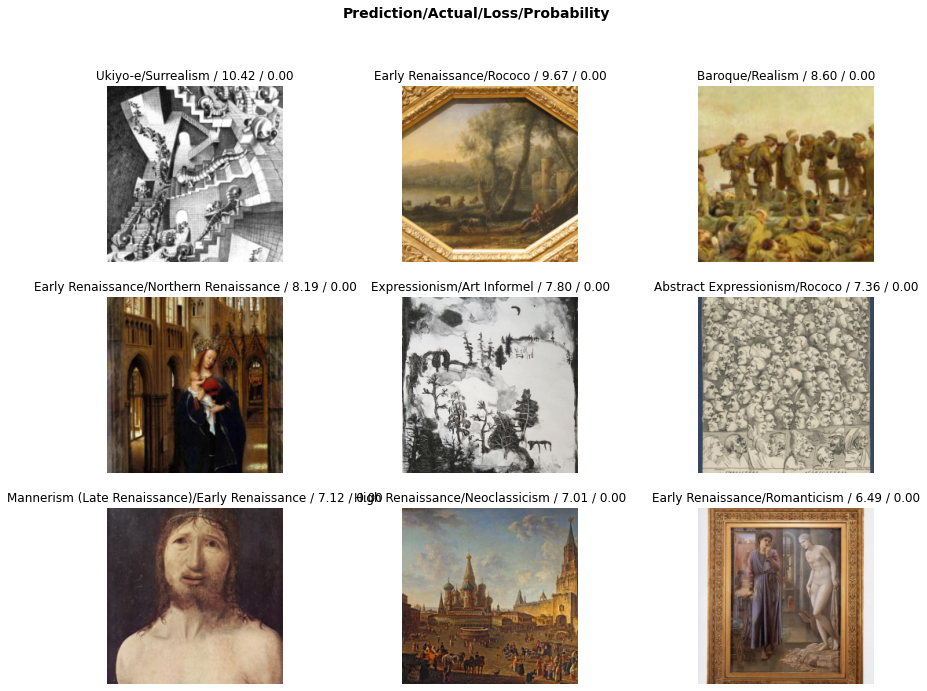

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))


In [ ]:
interp.most_confused(min_val=2)

#confusion matrix! Not sure helpful tho
interp.plot_confusion_matrix()



Improving the Model

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


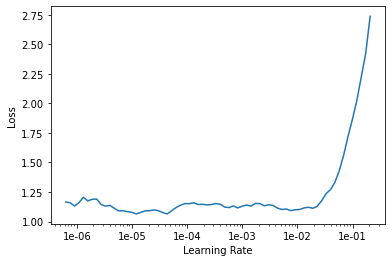

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
# using new learning rate here
learn.fit_one_cycle(20,.09)
learn.save('stage-2')

epoch,train_loss,valid_loss,error_rate,time
0,4.041381,4.726448,0.917431,00:08
1,3.849618,6612.994141,0.917431,00:08
2,3.943275,799850.062500,0.954128,00:08
3,4.094635,843002.437500,0.972477,00:08
4,4.833202,17186658.000000,0.935780,00:08
5,5.925513,5.743281,0.944954,00:09
6,6.853887,111327944.000000,0.981651,00:08
7,7.373511,52625.089844,0.935780,00:09
8,7.809309,563415.812500,0.954128,00:08
9,8.510242,5.382062,0.981651,00:08


##TODO for Week 6

Improving the Model by Choosing what styles to classify

1. Consolidating all "Renaissance" art: Early Renaissance, High Renaissance, Mannerism (Late Renaissance), and Northern Renaissance

2. Considering the top losses and removing the style that is less prominent (ie the style with less examples from the original Kaggle data)

3. Increasing the data size (upload more files over the weekend)



In [3]:
# how much does "renaissance" add to the total error?
for c in classes:
  if "renaissance" in c.lower():
    classes.remove(c)
print(classes)

NameError: ignored